In [1]:
#pip install pmdarima

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime, timedelta


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [4]:
#Fetch only Finance Data
try:
    df_dbFinanceData = SqlConn.fetchFinanceData("twitter")
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
df_dbFinanceData["date"] = pd.to_datetime(df_dbFinanceData["date"])
df_dbFinanceData.set_index("date", inplace=True)
df_dbFinanceData

,financeType,open,high,low,close,adjustedClose,volume
date,,,,,,,
2013-11-07,twitter,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,twitter,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,twitter,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,twitter,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,twitter,41.029999,42.869999,40.759998,42.599998,42.599998,8688300
...,...,...,...,...,...,...,...
2022-07-06,twitter,38.209999,38.450001,37.740002,38.209999,38.209999,4870300
2022-07-07,twitter,38.320000,39.509998,38.320000,38.790001,38.790001,13214900
2022-07-08,twitter,37.509998,37.549999,36.799999,36.810001,36.810001,26156700


In [6]:
df_dbFinanceData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2183 entries, 2013-11-07 to 2022-07-12
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   financeType    2183 non-null   object 
 1   open           2183 non-null   float64
 2   high           2183 non-null   float64
 3   low            2183 non-null   float64
 4   close          2183 non-null   float64
 5   adjustedClose  2183 non-null   float64
 6   volume         2183 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.4+ KB


<AxesSubplot:xlabel='date'>

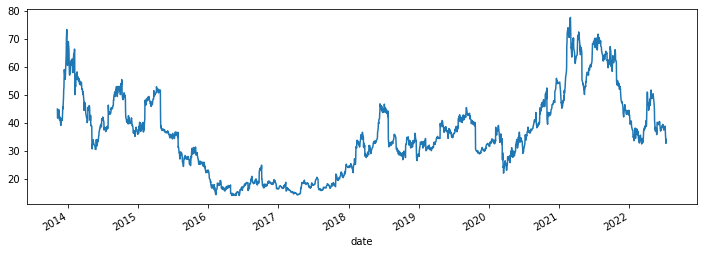

In [7]:
df_dbFinanceData['adjustedClose'].plot(figsize=(12,4))

In [8]:
df_dbFinanceData.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11', '2022-07-12'],
              dtype='datetime64[ns]', name='date', length=2183, freq=None)

<AxesSubplot:xlabel='date'>

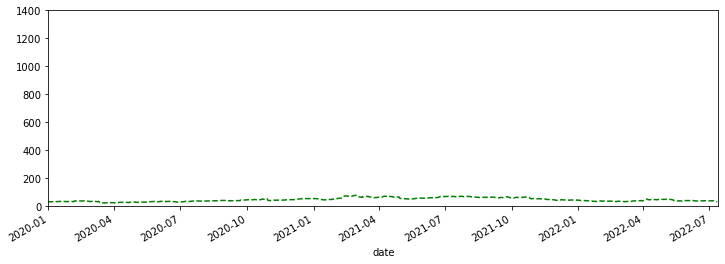

In [9]:
df_dbFinanceData['adjustedClose'].plot(xlim=['2020-01-01','2022-07-13'],ylim=[0,1400],figsize=(12,4),ls='--',c='green')

<AxesSubplot:xlabel='date'>

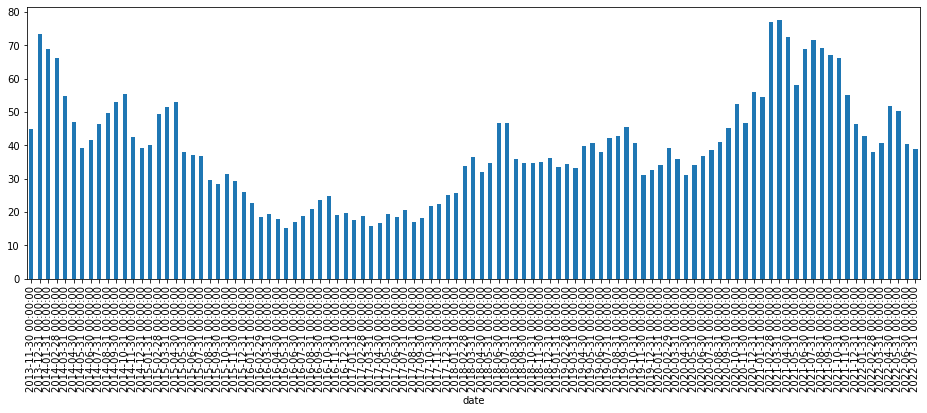

In [10]:
#Resampling to display monthly data
df_resampled = df_dbFinanceData['adjustedClose'].resample(rule='M')
df_resampled.max().plot(kind='bar',figsize=(16,5))

In [11]:
df_filteredData = df_dbFinanceData.loc['2020-01-01':'2022-7-13']
df_filteredData.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11', '2022-07-12'],
              dtype='datetime64[ns]', name='date', length=636, freq=None)

<AxesSubplot:xlabel='date'>

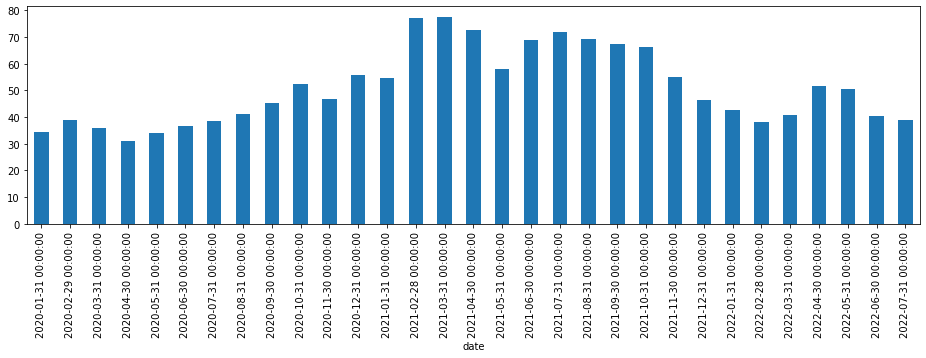

In [12]:
#Nov 2021 was the month when Tesla had highest value - checked over internet and found Nov 4 2021 was marked as highest price for Tesla stocks.
df_filteredData['adjustedClose'].resample(rule='M').max().plot(kind='bar', figsize=(16,4))

<AxesSubplot:xlabel='date'>

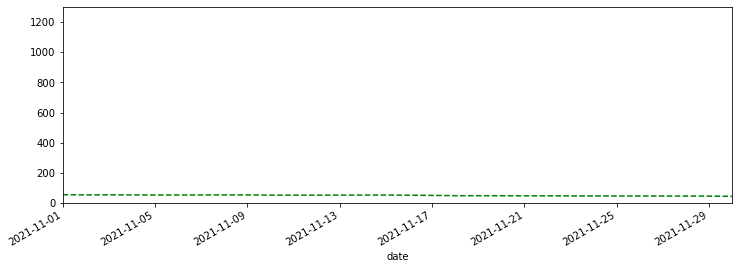

In [13]:
df_filteredData['adjustedClose'].plot(xlim=['2021-11-01','2021-11-30'],ylim=[0,1300],figsize=(12,4),ls='--',c='green')


<AxesSubplot:xlabel='date'>

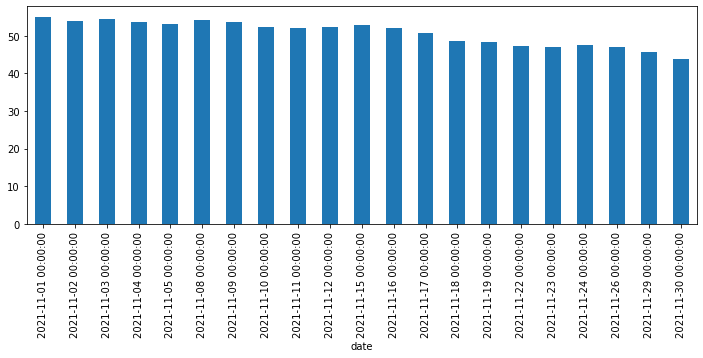

In [14]:
# checked over internet and found Nov 4 2021 was marked as highest price for Tesla stocks.
df_filteredData.loc['2021-11-01':'2021-11-30']['adjustedClose'].plot(kind='bar',figsize=(12,4))

In [15]:
#5 and 15 days rolling mean
df_dbFinanceData["adjustedClose:5 Days Rolling mean"]=df_dbFinanceData['adjustedClose'].rolling(5).mean() 
df_dbFinanceData["adjustedClose:15 Days Rolling mean"]=df_dbFinanceData['adjustedClose'].rolling(15).mean() 
df_dbFinanceData["adjustedClose:60 Days Rolling mean"]=df_dbFinanceData['adjustedClose'].rolling(60).mean() 
df_dbFinanceData

,financeType,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean
date,,,,,,,,,,
2013-11-07,twitter,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,NaN,NaN,NaN
2013-11-08,twitter,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,NaN,NaN,NaN
2013-11-11,twitter,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,NaN,NaN,NaN
2013-11-12,twitter,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,NaN,NaN,NaN
2013-11-13,twitter,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,42.790001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-06,twitter,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,38.002000,38.258000,42.260000
2022-07-07,twitter,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,38.200000,38.362667,42.136000
2022-07-08,twitter,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,38.084000,38.284000,41.966000


<AxesSubplot:xlabel='date'>

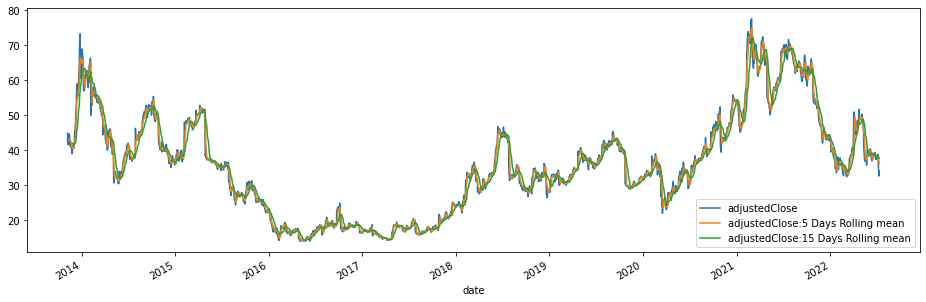

In [16]:
#smoothening the line
df_dbFinanceData[['adjustedClose','adjustedClose:5 Days Rolling mean','adjustedClose:15 Days Rolling mean']].plot(figsize=(16,5))

<AxesSubplot:xlabel='date'>

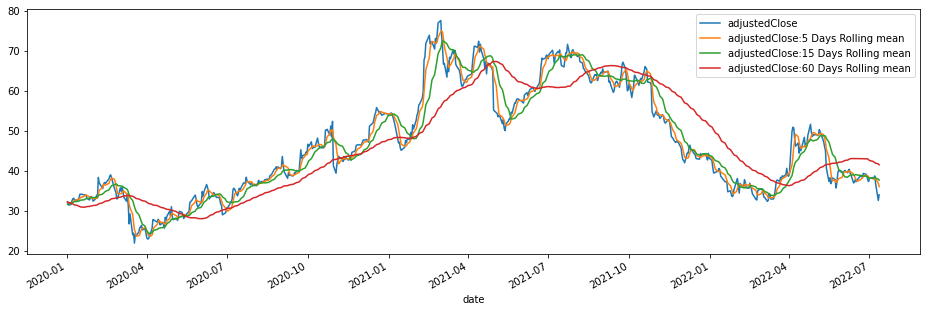

In [17]:
#smoothening the line
df_dbFinanceData.loc['2020-01-01':'2022-7-13'][['adjustedClose','adjustedClose:5 Days Rolling mean','adjustedClose:15 Days Rolling mean','adjustedClose:60 Days Rolling mean']].plot(figsize=(16,5))

#rolling mean of 5 days is closer compared to 15 days

<AxesSubplot:xlabel='date'>

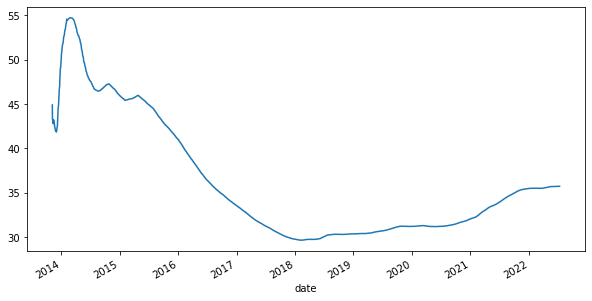

In [18]:
#Cummulative moving average
df_dbFinanceData['adjustedClose'].expanding().mean().plot(figsize=(10,5))

In [19]:
#exponential weighted moving average
df_dbFinanceData['emw0.2']=df_dbFinanceData['adjustedClose'].ewm(alpha=0.2,adjust=False).mean()
df_dbFinanceData['emw0.4']=df_dbFinanceData['adjustedClose'].ewm(alpha=0.4,adjust=False).mean()
df_dbFinanceData['emw_span5']=df_dbFinanceData['adjustedClose'].ewm(span=2,).mean()

<AxesSubplot:xlabel='date'>

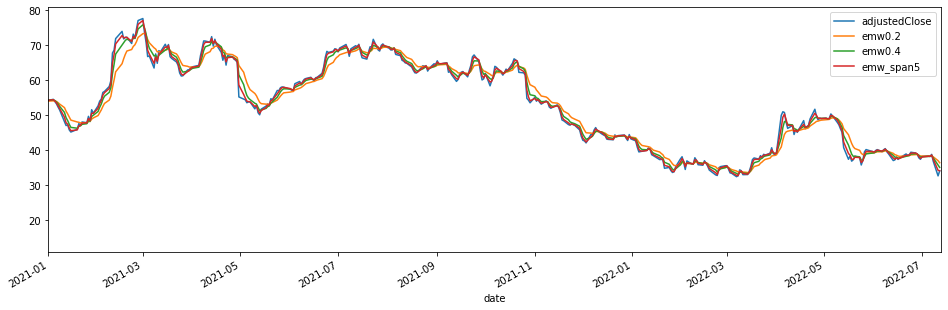

In [20]:
df_dbFinanceData[['adjustedClose','emw0.2','emw0.4','emw_span5']].plot(xlim=['2021-01-01','2022-7-13'],figsize=(16,5))

<AxesSubplot:xlabel='date'>

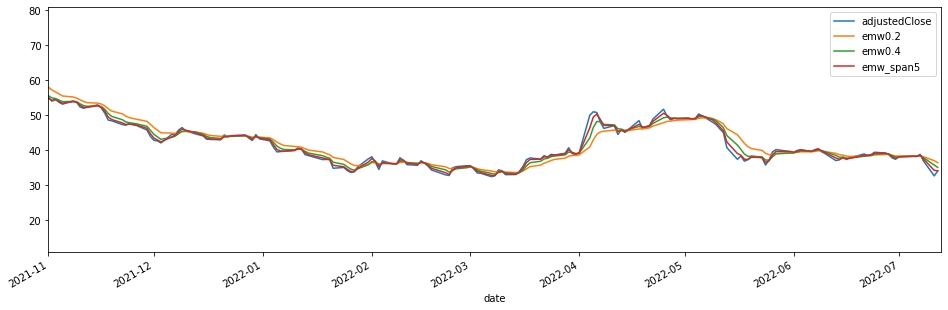

In [21]:
df_dbFinanceData[['adjustedClose','emw0.2','emw0.4','emw_span5']].plot(xlim=['2021-11-01','2022-7-13'],figsize=(16,5))

# Applying ARIMA Model

In [22]:
#Augmented Dickey–Fuller test
def adf_test(series):
    results = adfuller(series)
    print('ADF statistics: {}'.format(results[0]))
    print('P value: {}'.format(results[1]))
    if results[1] < 0.05:
        print("Ho Rejected - data is stationary")
    else:    
        print("Ho Accepted- data is not stationary")

In [23]:
adf_test(df_dbFinanceData['adjustedClose'])

ADF statistics: -2.2428134313562764
P value: 0.19107504800406266
Ho Accepted- data is not stationary


In [24]:
df_dbFinanceData['adjustedClose_first_diff']=df_dbFinanceData['adjustedClose']-df_dbFinanceData['adjustedClose'].shift(1)

In [25]:
adf_test(df_dbFinanceData['adjustedClose_first_diff'].dropna())
#d=1

ADF statistics: -12.152533365504047
P value: 1.5584201247374807e-22
Ho Rejected - data is stationary


In [26]:
df_dbFinanceData

,financeType,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean,emw0.2,emw0.4,emw_span5,adjustedClose_first_diff
date,,,,,,,,,,,,,,
2013-11-07,twitter,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,NaN,NaN,NaN,44.900002,44.900002,44.900002,NaN
2013-11-08,twitter,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,NaN,NaN,NaN,44.250002,43.600002,42.462502,-3.250000
2013-11-11,twitter,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,NaN,NaN,NaN,43.980002,43.320002,42.765387,1.250000
2013-11-12,twitter,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,NaN,NaN,NaN,43.564002,42.752002,42.181252,-1.000000
2013-11-13,twitter,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,42.790001,NaN,NaN,43.371201,42.691200,42.461570,0.699996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,twitter,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,38.002000,38.258000,42.260000,38.301973,38.215841,38.228554,-0.170002
2022-07-07,twitter,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,38.200000,38.362667,42.136000,38.399579,38.445505,38.602852,0.580002
2022-07-08,twitter,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,38.084000,38.284000,41.966000,38.081663,37.791303,37.407618,-1.980000


# Calculate AR(p), I(d), MA(q) 

In [27]:
#Estimate ARIMA differencing term,
ndiffs(df_dbFinanceData['adjustedClose'],test='adf')

1

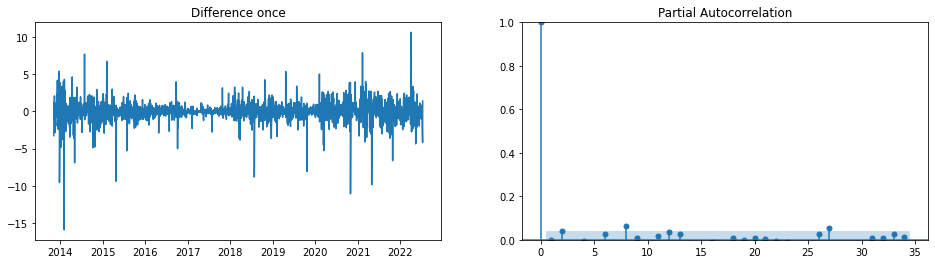

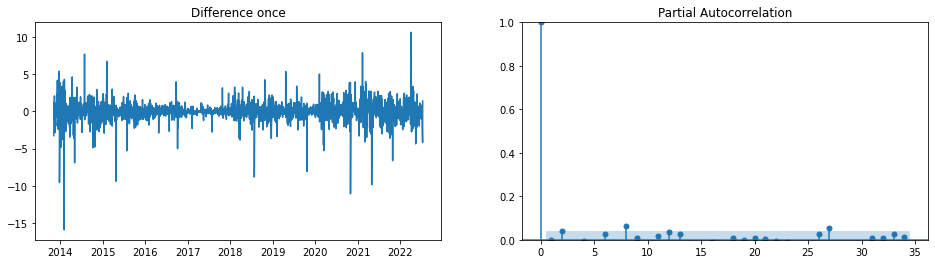

In [28]:
diff= df_dbFinanceData['adjustedClose'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)
#p=3

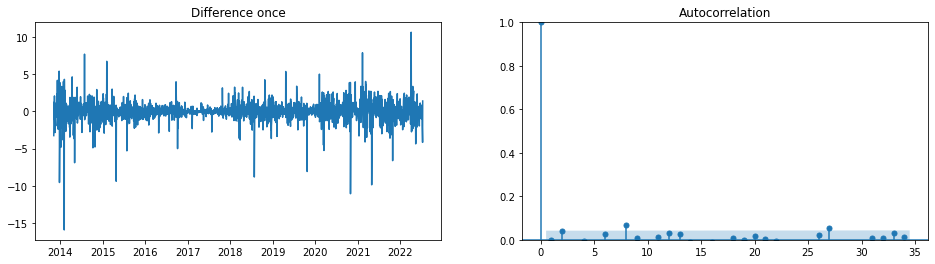

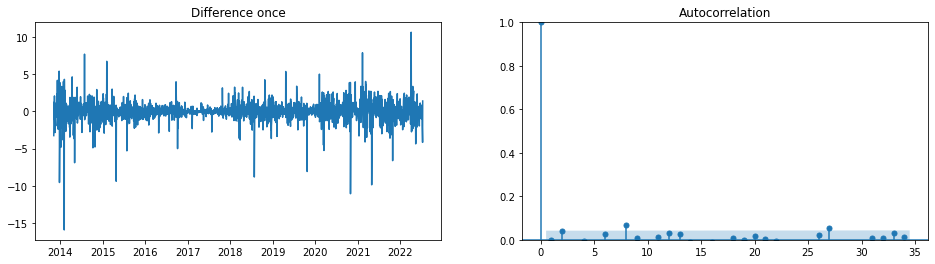

In [29]:
diff= df_dbFinanceData['adjustedClose'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)
#q=3

#Other ways to find P and Q

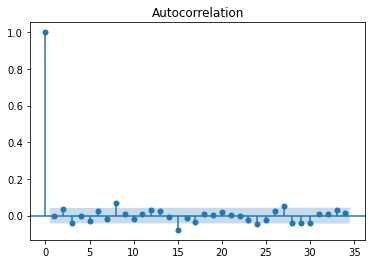

In [30]:
acf = plot_acf(df_dbFinanceData['adjustedClose_first_diff'].dropna())
#q=3

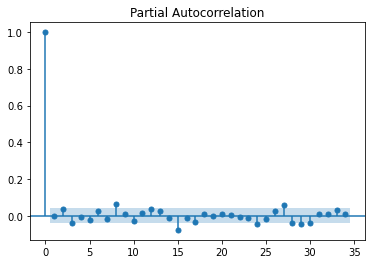

In [31]:
acf = plot_pacf(df_dbFinanceData['adjustedClose_first_diff'].dropna())
#p=3

third way to find p,d,q- using Auto_arima

In [32]:
stepwise_fit = auto_arima(df_dbFinanceData['adjustedClose'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7442.553, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7444.159, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7446.159, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7446.159, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7442.189, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7440.883, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7440.573, Time=1.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7444.838, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7445.380, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7440.604, Time=0.52 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7443.590, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7438.603, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7438.915, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2183
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3715.301
Date:                Mon, 18 Jul 2022   AIC                           7438.603
Time:                        23:19:45   BIC                           7461.355
Sample:                             0   HQIC                          7446.920
                               - 2183                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8399      0.080    -10.479      0.000      -0.997      -0.683
ar.L2          0.0356      0.016      2.194      0.028       0.004       0.067
ma.L1          0.8432      0.080     10.493      0.000       0.686       1.001
sigma2         1.7639      0.017    102.648      0.000       1.730       1.798
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             39057.98
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -1.38
Prob(H) (two-sided):                  0.34   Kurtosis:                        23.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitting the Model and Predicting

In [33]:
df_arima = df_dbFinanceData.copy()
df_arima.drop(columns=['financeType'],inplace=True)
train_dataset_end=datetime(2021,7,31)
test_dataset_end=datetime(2022,7,31)

In [34]:
train_data=df_arima[:train_dataset_end]
test_data=df_arima[train_dataset_end+timedelta(days=1):test_dataset_end]

In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:
train_data

,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean,emw0.2,emw0.4,emw_span5,adjustedClose_first_diff
date,,,,,,,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,NaN,NaN,NaN,44.900002,44.900002,44.900002,NaN
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,NaN,NaN,NaN,44.250002,43.600002,42.462502,-3.250000
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,NaN,NaN,NaN,43.980002,43.320002,42.765387,1.250000
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,NaN,NaN,NaN,43.564002,42.752002,42.181252,-1.000000
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,42.790001,NaN,NaN,43.371201,42.691200,42.461570,0.699996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,71.250000,71.250000,67.470001,68.690002,68.690002,29185100,69.486001,68.828667,61.246833,69.033910,69.455118,69.427273,-3.000000
2021-07-27,68.320000,69.480003,66.860001,68.330002,68.330002,16988300,69.564001,68.703334,61.465333,68.893128,69.005071,68.695759,-0.360000
2021-07-28,68.389999,71.919998,67.760002,69.959999,69.959999,23203600,69.648001,68.783334,61.721667,69.106503,69.387042,69.538586,1.629997


In [37]:
test_data

,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean,emw0.2,emw0.4,emw_span5,adjustedClose_first_diff
date,,,,,,,,,,,,,
2021-08-02,70.230003,70.440002,68.660004,69.129997,69.129997,12040800,69.508000,69.022667,62.513000,69.375889,69.512880,69.374761,-0.620003
2021-08-03,69.870003,70.959999,68.080002,68.629997,68.629997,9221400,69.567999,68.958000,62.760333,69.226711,69.159727,68.878252,-0.500000
2021-08-04,68.680000,69.080002,67.910004,68.699997,68.699997,7578400,69.315999,68.853334,63.041833,69.121368,68.975835,68.759415,0.070000
2021-08-05,68.849998,69.449997,68.080002,69.279999,69.279999,8634600,69.097998,68.934000,63.315166,69.153094,69.097501,69.106471,0.580002
2021-08-06,69.300003,69.809998,66.879997,67.370003,67.370003,11458100,68.621999,68.998000,63.593000,68.796476,68.406502,67.948826,-1.909996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,38.002000,38.258000,42.260000,38.301973,38.215841,38.228554,-0.170002
2022-07-07,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,38.200000,38.362667,42.136000,38.399579,38.445505,38.602852,0.580002
2022-07-08,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,38.084000,38.284000,41.966000,38.081663,37.791303,37.407618,-1.980000


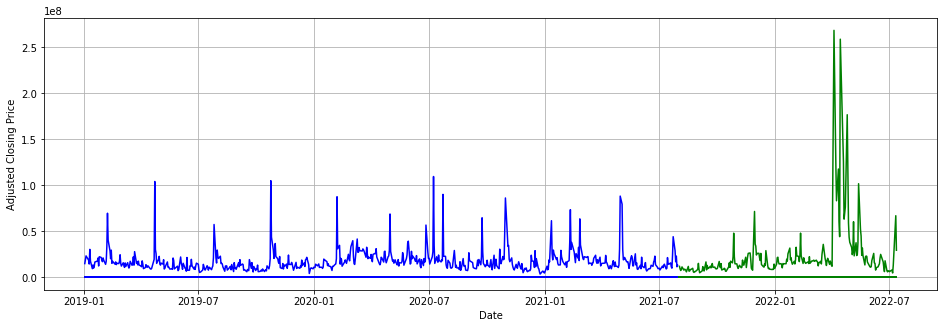

In [38]:
startdate=datetime(2019,1,1)
plt.figure(figsize=(16,5))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.plot(train_data[startdate:],'blue', label="training data")
plt.plot(test_data, 'green' , label="testing data")
#plt.legend(loc="upper left")

# Train the ARIMA Model

In [114]:
model_ARIMA=sm.tsa.arima.ARIMA(train_data['adjustedClose'],order=(3,1,3))

C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [115]:
model_ARIMA_fit = model_ARIMA.fit()

C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          adjustedClose   No. Observations:                 1945
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3267.441
Date:                Mon, 18 Jul 2022   AIC                           6548.882
Time:                        23:30:01   BIC                           6587.889
Sample:                             0   HQIC                          6563.225
                               - 1945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2023      0.043      4.737      0.000       0.119       0.286
ar.L2          0.0763      0.045      1.694      0.090      -0.012       0.165
ar.L3         -0.9012      0.042    -21.408      0.000      -0.984      -0.819
ma.L1         -0.2136      0.049     -4.387      0.000      -0.309      -0.118
ma.L2         -0.0316      0.052     -0.605      0.545      -0.134       0.071
ma.L3          0.8551      0.050     17.069      0.000       0.757       0.953
sigma2         1.6841      0.020     85.193      0.000       1.645       1.723
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             36621.51
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -1.71
Prob(H) (two-sided):                  0.03   Kurtosis:                        23.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:ylabel='Density'>

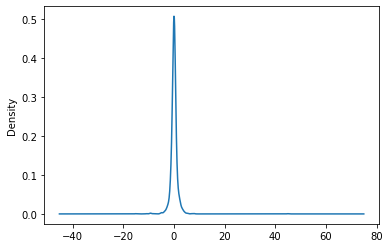

In [117]:
model_ARIMA_fit.resid.plot(kind='kde')

(array([4.27719205e-04, 2.13859602e-03, 1.60480246e-01, 3.25066595e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.55438409e-05]),
 array([-15.20237498,  -9.19213728,  -3.18189958,   2.82833811,
          8.83857581,  14.84881351,  20.85905121,  26.86928891,
         32.8795266 ,  38.8897643 ,  44.900002  ]),
 <BarContainer object of 10 artists>)

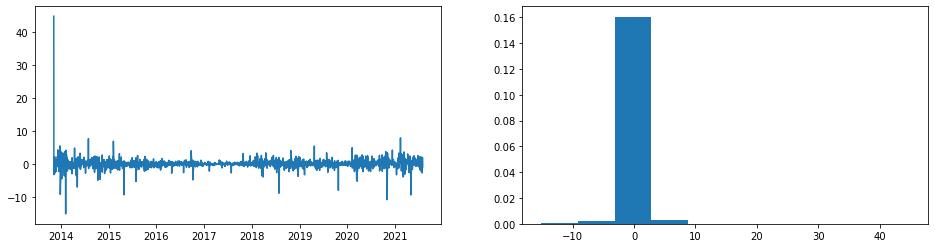

In [118]:
resids = pd.DataFrame(model_ARIMA_fit.resid)
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,4))
ax1.plot(resids)
ax2.hist(resids, density=True)

In [119]:
##prediction
pred_start_date=pd.to_datetime(test_data.index[0])
pred_end_date=pd.to_datetime(test_data.index[-1])
print(pred_start_date)
print(pred_end_date)

2021-08-02 00:00:00
2022-07-12 00:00:00


In [120]:
-len(train_data)

-1945

Predicted Adjustclose Values
1945    70.024791
1946    69.814351
1947    69.560284
1948    69.245198
1949    69.351720
          ...    
2178    69.601743
2179    69.612540
2180    69.622685
2181    69.623656
2182    69.614896
Name: predicted_mean, Length: 238, dtype: float64


C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


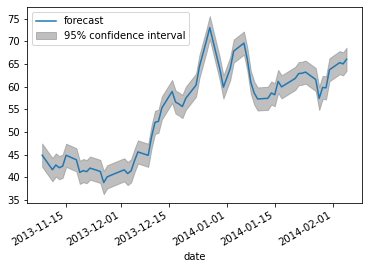

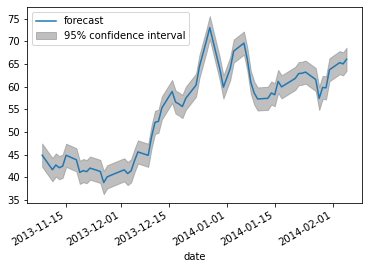

In [121]:
from statsmodels.graphics.tsaplots import plot_predict
adjustedCloseByArima_pred =model_ARIMA_fit.predict(start=len(train_data),end=(len(train_data) + len(test_data)-1)) 
adjustedCloseByArima_predictions = model_ARIMA_fit.get_prediction(start = -len(test_data))
residuals = test_data['adjustedClose']-adjustedCloseByArima_pred
print("Predicted Adjustclose Values")
print(adjustedCloseByArima_pred)
plot_predict(model_ARIMA_fit, start=1, end=60,dynamic=False)

In [122]:
df_yPred = adjustedCloseByArima_predictions.summary_frame(alpha=0.10)

# Extract prediction mean
mean_forecast = adjustedCloseByArima_predictions.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = adjustedCloseByArima_predictions.conf_int()
confidence_intervals


,lower adjustedClose,upper adjustedClose
date,,
2020-08-20,36.340593,41.427609
2020-08-21,36.413905,41.500921
2020-08-24,36.698573,41.785589
2020-08-25,37.943850,43.030866
2020-08-26,38.048046,43.135061
...,...,...
2021-07-26,68.873587,73.960602
2021-07-27,65.944722,71.031737
2021-07-28,65.493193,70.580209


<AxesSubplot:xlabel='date'>

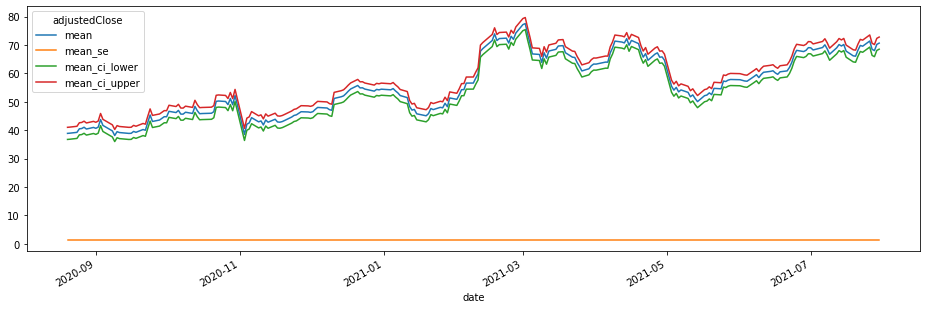

In [123]:
df_yPred.plot(figsize=(16,5))

In [124]:
d1 = pd.DataFrame(test_data['adjustedClose'])
d2 = pd.DataFrame(mean_forecast)
d2['date'] = d1.index
d2.set_index('date',inplace=True)
df_y_yPred = pd.concat([d1,d2],axis=1)

In [125]:
df_y_yPred

,adjustedClose,predicted_mean
date,,
2021-08-02,69.129997,38.884101
2021-08-03,68.629997,38.957413
2021-08-04,68.699997,39.242081
2021-08-05,69.279999,40.487358
2021-08-06,67.370003,40.591554
...,...,...
2022-07-06,38.209999,71.417095
2022-07-07,38.790001,68.488230
2022-07-08,36.810001,68.036701


<AxesSubplot:xlabel='date'>

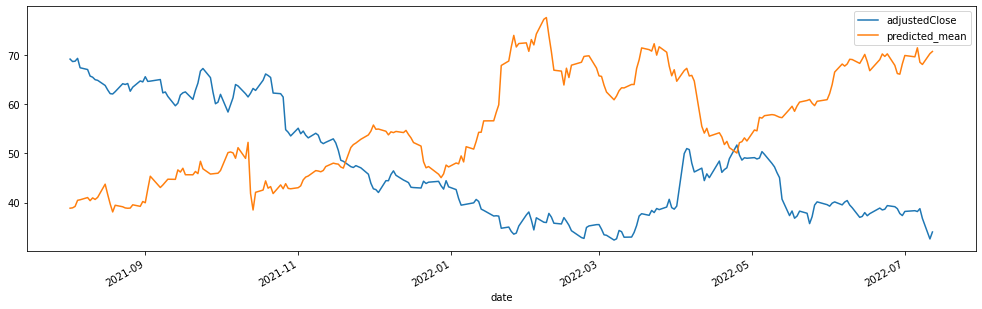

In [126]:
df_y_yPred.plot(figsize=(17,5))

# Forecasting

In [127]:
step = 30
fc = model_ARIMA_fit.forecast(step)
lst_fc = list(fc)
lst_fc

C:\Users\dantw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


[70.02479086619269,
 69.81435130979297,
 69.56028373409647,
 69.24519766219831,
 69.35172015144272,
 69.57817309452464,
 69.91605470725817,
 69.90568272424208,
 69.7253023871118,
 69.38353590419838,
 69.3099901923816,
 69.43158164034843,
 69.75855295998717,
 69.90024360011644,
 69.8442846654787,
 69.54912270938082,
 69.35746483310425,
 69.34659919632078,
 69.59576543239733,
 69.81804893618515,
 69.89181858160211,
 69.69916313353585,
 69.46551170568958,
 69.33706878799072,
 69.46687221380132,
 69.69388266584104,
 69.86545506193605,
 69.80050876786204,
 69.59589289589336,
 69.39493333683384]

In [128]:
fc

1945    70.024791
1946    69.814351
1947    69.560284
1948    69.245198
1949    69.351720
1950    69.578173
1951    69.916055
1952    69.905683
1953    69.725302
1954    69.383536
1955    69.309990
1956    69.431582
1957    69.758553
1958    69.900244
1959    69.844285
1960    69.549123
1961    69.357465
1962    69.346599
1963    69.595765
1964    69.818049
1965    69.891819
1966    69.699163
1967    69.465512
1968    69.337069
1969    69.466872
1970    69.693883
1971    69.865455
1972    69.800509
1973    69.595893
1974    69.394933
Name: predicted_mean, dtype: float64

In [129]:
import time
import datetime
from datetime import date,timedelta


end_date = pred_end_date 

date_future = end_date + datetime.timedelta(41)

df_future_dates = pd.date_range(start=end_date, end=date_future,freq='B')
df_future_dates

DatetimeIndex(['2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22'],
              dtype='datetime64[ns]', freq='B')

In [130]:
df_future_dates

DatetimeIndex(['2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22'],
              dtype='datetime64[ns]', freq='B')

In [131]:
df_combine = pd.DataFrame(df_future_dates,lst_fc)
df_combine.columns=['date']
df_combine

,date
70.024791,2022-07-12
69.814351,2022-07-13
69.560284,2022-07-14
69.245198,2022-07-15
69.351720,2022-07-18
69.578173,2022-07-19
69.916055,2022-07-20
69.905683,2022-07-21
69.725302,2022-07-22
69.383536,2022-07-25


In [132]:
df_combine = df_combine.reset_index()
df_combine = df_combine.set_index('date')
df_combine

,index
date,
2022-07-12,70.024791
2022-07-13,69.814351
2022-07-14,69.560284
2022-07-15,69.245198
2022-07-18,69.351720
2022-07-19,69.578173
2022-07-20,69.916055
2022-07-21,69.905683
2022-07-22,69.725302


In [133]:
df_combine.rename(columns={"index":"forecasted_mean"},inplace=True)

In [134]:
df_combine

,forecasted_mean
date,
2022-07-12,70.024791
2022-07-13,69.814351
2022-07-14,69.560284
2022-07-15,69.245198
2022-07-18,69.351720
2022-07-19,69.578173
2022-07-20,69.916055
2022-07-21,69.905683
2022-07-22,69.725302


In [135]:
test_data

,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean,emw0.2,emw0.4,emw_span5,adjustedClose_first_diff
date,,,,,,,,,,,,,
2021-08-02,70.230003,70.440002,68.660004,69.129997,69.129997,12040800,69.508000,69.022667,62.513000,69.375889,69.512880,69.374761,-0.620003
2021-08-03,69.870003,70.959999,68.080002,68.629997,68.629997,9221400,69.567999,68.958000,62.760333,69.226711,69.159727,68.878252,-0.500000
2021-08-04,68.680000,69.080002,67.910004,68.699997,68.699997,7578400,69.315999,68.853334,63.041833,69.121368,68.975835,68.759415,0.070000
2021-08-05,68.849998,69.449997,68.080002,69.279999,69.279999,8634600,69.097998,68.934000,63.315166,69.153094,69.097501,69.106471,0.580002
2021-08-06,69.300003,69.809998,66.879997,67.370003,67.370003,11458100,68.621999,68.998000,63.593000,68.796476,68.406502,67.948826,-1.909996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,38.002000,38.258000,42.260000,38.301973,38.215841,38.228554,-0.170002
2022-07-07,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,38.200000,38.362667,42.136000,38.399579,38.445505,38.602852,0.580002
2022-07-08,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,38.084000,38.284000,41.966000,38.081663,37.791303,37.407618,-1.980000


In [136]:
test_data

,open,high,low,close,adjustedClose,volume,adjustedClose:5 Days Rolling mean,adjustedClose:15 Days Rolling mean,adjustedClose:60 Days Rolling mean,emw0.2,emw0.4,emw_span5,adjustedClose_first_diff
date,,,,,,,,,,,,,
2021-08-02,70.230003,70.440002,68.660004,69.129997,69.129997,12040800,69.508000,69.022667,62.513000,69.375889,69.512880,69.374761,-0.620003
2021-08-03,69.870003,70.959999,68.080002,68.629997,68.629997,9221400,69.567999,68.958000,62.760333,69.226711,69.159727,68.878252,-0.500000
2021-08-04,68.680000,69.080002,67.910004,68.699997,68.699997,7578400,69.315999,68.853334,63.041833,69.121368,68.975835,68.759415,0.070000
2021-08-05,68.849998,69.449997,68.080002,69.279999,69.279999,8634600,69.097998,68.934000,63.315166,69.153094,69.097501,69.106471,0.580002
2021-08-06,69.300003,69.809998,66.879997,67.370003,67.370003,11458100,68.621999,68.998000,63.593000,68.796476,68.406502,67.948826,-1.909996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,38.002000,38.258000,42.260000,38.301973,38.215841,38.228554,-0.170002
2022-07-07,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,38.200000,38.362667,42.136000,38.399579,38.445505,38.602852,0.580002
2022-07-08,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,38.084000,38.284000,41.966000,38.081663,37.791303,37.407618,-1.980000


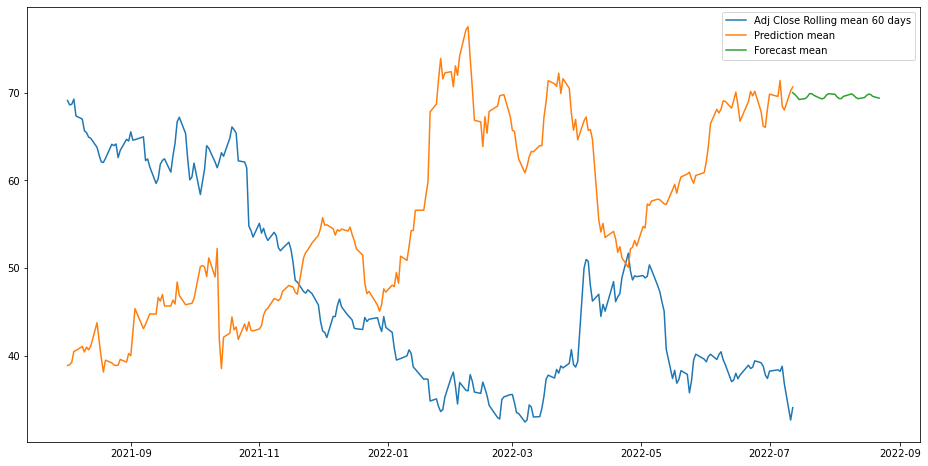

In [137]:
#plot the predictions for validation set
plt.figure(figsize=(16, 8))
plt.plot(test_data["adjustedClose"], label='Adj Close Rolling mean 60 days')
#plt.plot(valid, label='Valid')
plt.plot(df_y_yPred["predicted_mean"], label='Prediction mean')
plt.plot(df_combine["forecasted_mean"], label='Forecast mean')
plt.legend()
plt.show()

In [138]:
mape = np.mean(np.abs(np.array(fc[:1])-np.array(test_data["adjustedClose"]))/np.abs(test_data["adjustedClose"]))
print("MAPE: " + str(mape))
#MEAN ABSOLUTE PERCENTAGE ERROR (MAPE) = 55.7% deviation of Predicted value to the Actual Value

MAPE: 0.5567631041621689
